## Imports


In [162]:
import torch
import torchvision
import numpy as np

import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

# HW №6 Neural Networks

## Task 1.1 (0.5 points)
In fully connected neural networks we typically combine linear layers with some non-linear activation function.


**Question:** Is it necessary to use non-linear activation function? What will happend if we build a neural network using only linear layers?

Write a short answer in your own words (2-3 sentences). In addition name several popular non-linearities and write their formulas.

You may answer the question in Russian as well as in English.

**Answer**:
Использование нелинейных функций активации в полностью подключенных нейронных сетях является критически важным. Нелинейные функции позволяют сети обучаться сложным, нелинейным задачам и моделям. Без них, при использовании только линейных слоев, сеть будет способна обучаться только линейным моделям, что сильно ограничивает ее возможности и применимость.

1. ReLU (Rectified Linear Unit): $f(z) = \begin{cases} z, & \text{если } z > 0 \ 0, & \text{если } z \leq 0 \end{cases}$
2. Sigmoid: $\sigma(z) = \frac{1}{1 + e^{-z}}$
3. Tanh: $\tanh(z) = \frac{e^{2z} - 1}{e^{2z} + 1}$
4. Softmax: $\sigma(z)i = \frac{e^{z_i}}{\sum{j=1}^{k} e^{z_j}} \quad \text{для } i \in {1, 2, ..., k}$ для каждого элемента x_i в векторе x


## Task 1.2 (0.5 points)
Sigmoid is typically used as a non-linear activation fuction. It is a mathematical function having a characteristic "S"-shaped curve defined by the formula:

$$\sigma(z)=\frac 1 {1 + e^{-z}}$$

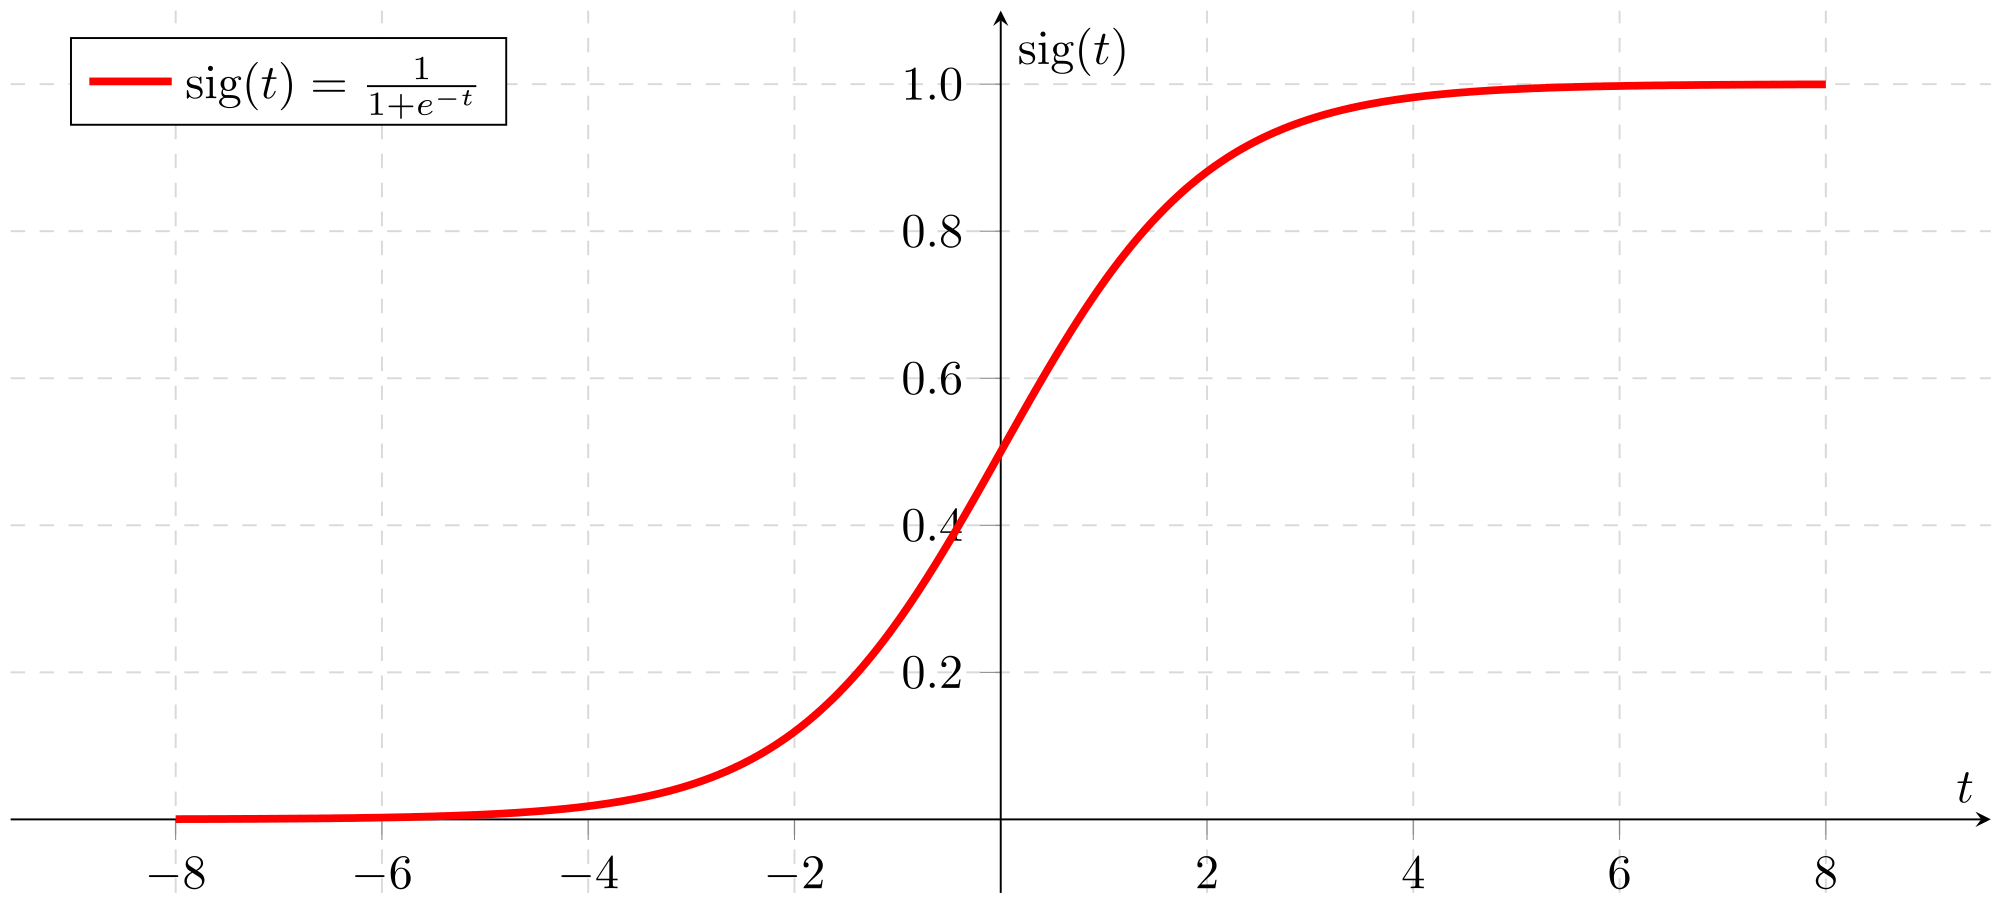

**Task:** implement sigmoid using `numpy`. Do not use `torch.nn.Sigmoid` or other sigmoid implementations.

In [163]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

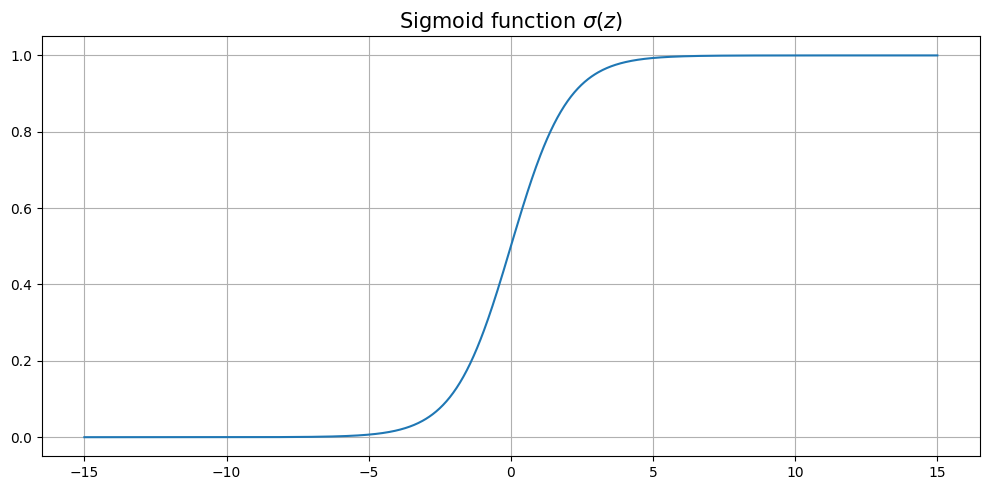

In [164]:
f = plt.figure(figsize=(10, 5))

z = np.linspace(-15, 15, 1000)
plt.plot(z, sigmoid(z))

plt.title('Sigmoid function $\sigma(z)$', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

## Task 1.3 (0.5 points)

Sigmoid is widely-used for its simple and nice derivative. Your task is to find it yourself.

Compute the derivative of the Sigmoid function. Write all necessary intermediate computations, just the formula of the derivative is not enough (we know you can Google it :)

$\sigma'(z)= \sigma(z)(1 - \sigma(z))$

Finding the derivative of the Sigmoid function
The Sigmoid function is defined as:

$\sigma'(z) = \frac{d}{dz}(\frac{1}{1 + e^{-z}})$

$\sigma'(z) = \frac{(1 + e^{-z})(0) - (1)(-e^{-z})}{(1 + e^{-z})^2}$

$\sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}$

$\sigma'(z) = \sigma(z)(1 - \sigma(z))$

## Task 1.4 (0.5 points)

Using the folmula you obtained in task 1.3 and your sigmoid implementation from task 1.2 implement derivative of the Sigmoid function.

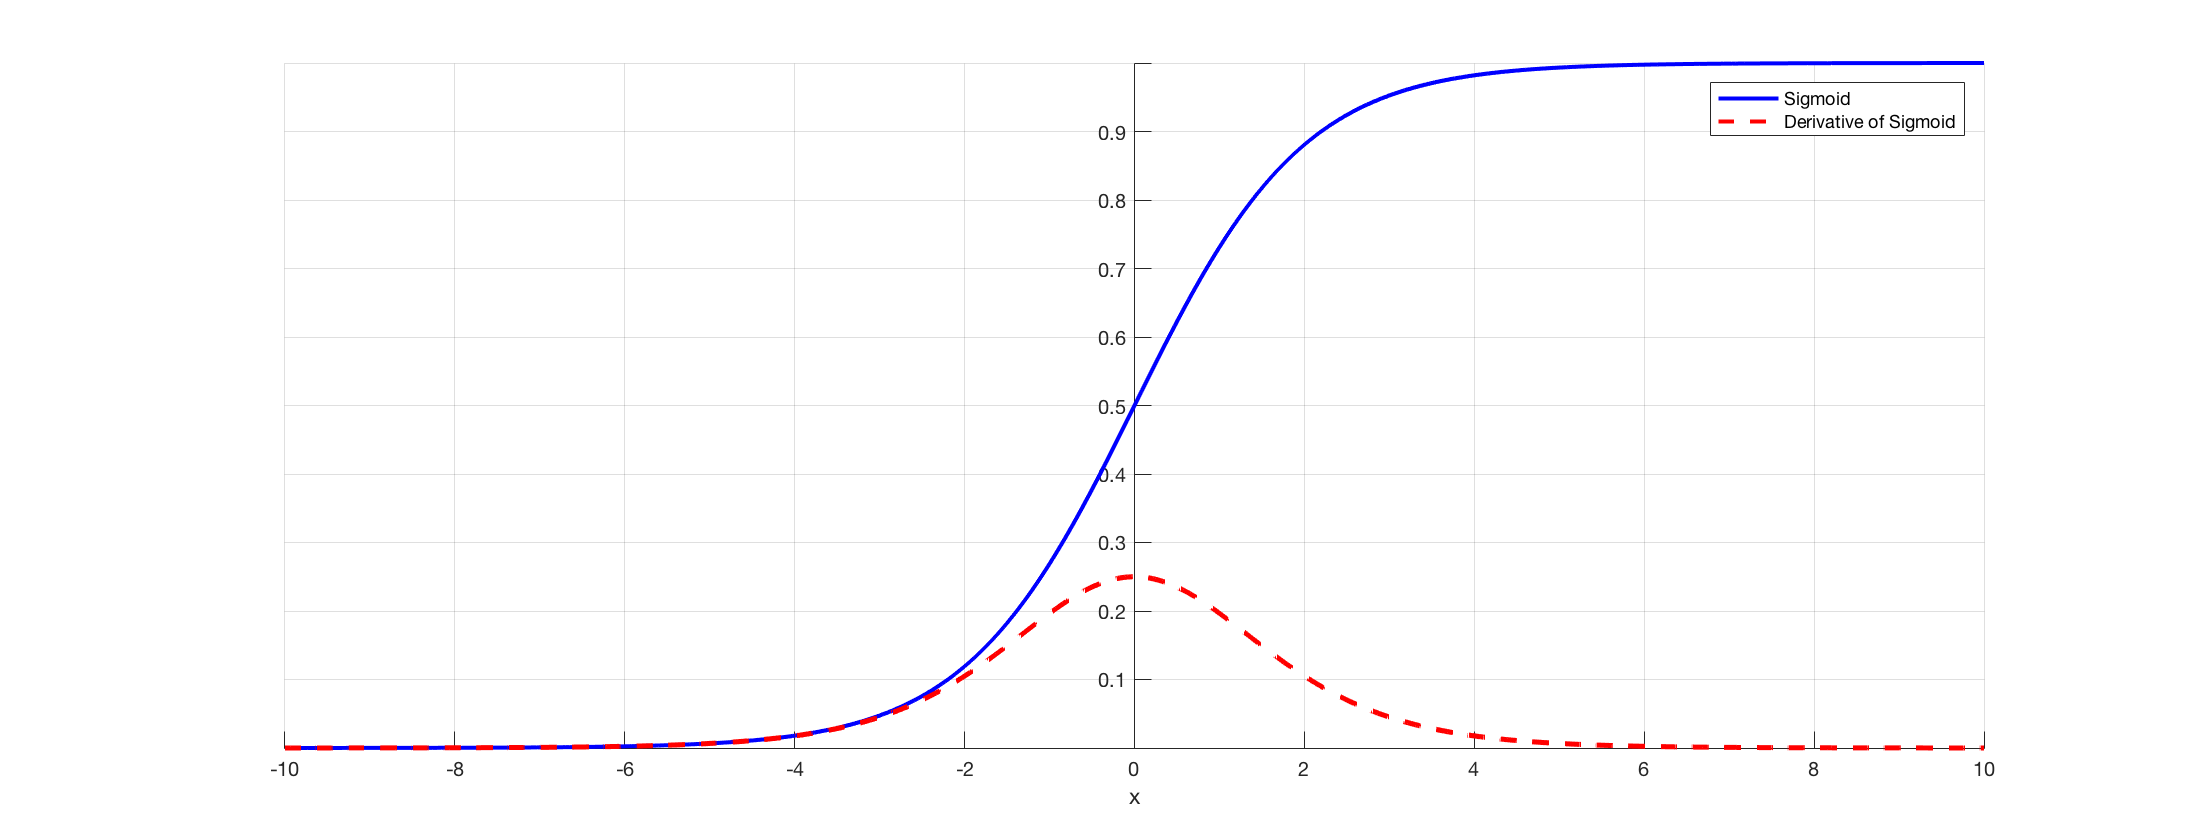

In [165]:
def sigmoid_derivative(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

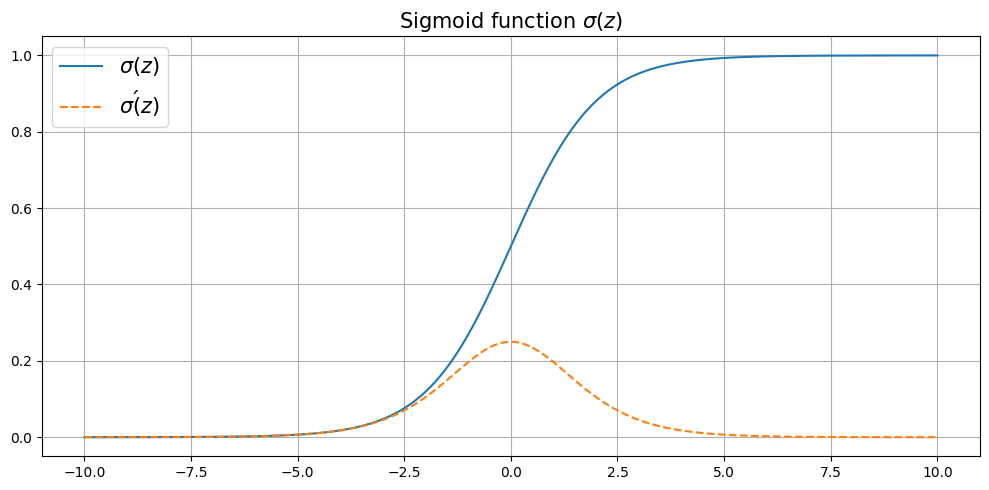

In [166]:
f = plt.figure(figsize=(10, 5))

z = np.linspace(-10, 10, 1000)
plt.plot(z, sigmoid(z), label=r'$\sigma (z)$')
plt.plot(z, sigmoid_derivative(z), label=r'$\sigma\' (z)$', linestyle='--')

plt.title('Sigmoid function $\sigma (z)$', fontsize=15)
plt.legend(fontsize=15)
plt.grid()

plt.tight_layout()

plt.show()

# PyTorch 101

PyTorch can be thought of as extended version of numpy which supports calculations on GPU (while numpy only on CPU) and implements autograd. Let's remember HW1 and do it in PyTorch now

## Task 2.1 (0.5 points)
Create a random array (`torch.randn`) with length of 17.

In [167]:
my_tensor = torch.randn(17)

In [168]:
print(f'Length: {len(my_tensor)}')
print(f'Type: {type(my_tensor)}')

Length: 17
Type: <class 'torch.Tensor'>


## Task 2.2 (0.5 points)
Using PyTorch calculate the sum of squares for $x \in [1, 10000]$:

$$ my\_sum = \sum_{1\leq i \leq 10001}{x^2} $$


**Warning! 0 for task if python loops are used!**

In [169]:
my_sum = (torch.arange(1, 10001) ** 2).sum()
print(my_sum)

tensor(333383335000)


## Task 2.3 (0.5 points)

1. Create a random array (`torch.randint`) with length of 76.
2. **Scale** the array so that
  1. Maximum element(s) value is -1.
  2. Minimum element(s) value is -4.


In [170]:
my_tensor = torch.randn(76)

In [171]:
def transform(tensor_):
    min_val = tensor_.min()
    max_val = tensor_.max()
    transformed_tensor = -1 - 3 * (tensor_ - min_val) / (max_val - min_val)
    return transformed_tensor

In [172]:
my_tensor_scaled = transform(my_tensor)
print(f'Min: {my_tensor_scaled.min()}')
print(f'Max: {my_tensor_scaled.max()}')
print('Array:')
print(my_tensor_scaled)

Min: -4.0
Max: -1.0
Array:
tensor([-1.9027, -1.7900, -1.8128, -2.5440, -2.0857, -1.4128, -3.7144, -1.7333,
        -3.1402, -1.9605, -2.3686, -2.0636, -3.0774, -2.5366, -1.6597, -1.5209,
        -1.7332, -2.7215, -1.2172, -2.3518, -2.8375, -3.9097, -2.6295, -2.7201,
        -3.0370, -3.5010, -1.2072, -1.5885, -2.6373, -3.1867, -2.4160, -2.5968,
        -2.5374, -3.2959, -1.1185, -2.4857, -4.0000, -1.9613, -3.5972, -2.9207,
        -2.4239, -2.1115, -2.4080, -1.4106, -2.7981, -2.0372, -1.0124, -1.4680,
        -2.5212, -3.0531, -2.9083, -2.1604, -3.2671, -2.2561, -2.7770, -2.0059,
        -2.2480, -2.8533, -1.0753, -3.1871, -1.0000, -1.5621, -1.9335, -2.2682,
        -1.8495, -2.9257, -2.3688, -2.6870, -1.9670, -3.2656, -2.5803, -2.0946,
        -2.0369, -1.2805, -2.0321, -2.5150])


## Task 2.4 (0.5 points)

Create two random 2D tensors of shapes 10X12 and 12X8.

In [173]:
x = torch.rand(10, 12)
y = torch.rand(12, 8)

Multiply them by matrix multiplication and write the result in the third tensor

In [174]:
mult_res = x @ y
print(mult_res)

tensor([[2.1353, 2.6418, 2.4274, 3.0486, 3.3372, 2.6685, 1.7281, 3.2526],
        [2.0260, 2.1920, 2.4144, 3.1303, 2.8932, 2.4877, 2.2648, 2.9534],
        [2.8135, 2.6757, 2.8263, 4.1572, 3.8569, 2.4875, 2.1094, 4.0278],
        [2.2009, 2.3588, 2.7520, 3.1200, 3.0274, 1.8301, 1.8885, 3.5420],
        [2.9380, 3.3786, 2.6305, 3.5460, 3.5559, 2.6799, 2.6148, 3.3393],
        [2.6465, 2.9991, 3.0563, 3.4183, 3.7564, 2.4728, 1.8565, 3.7369],
        [3.0350, 2.5680, 1.9117, 3.7700, 4.0518, 2.5068, 2.0420, 4.1266],
        [1.8905, 1.4527, 1.6517, 2.6534, 2.7869, 1.7932, 1.3904, 2.5787],
        [2.3208, 2.6596, 3.2118, 2.6480, 3.2593, 2.5870, 2.4337, 3.6455],
        [2.3376, 1.9950, 2.3611, 3.0558, 2.8886, 1.9880, 1.7695, 3.0856]])


Implement function ReLU using only pytorch and apply it to `x` (do not use modules `torch.nn`, its sub modules and `torch.relu`).

**Warning! 0 for task if python loops are used!**

$$
my\_relu(z)=max(0, z)
$$

In [175]:
def my_relu(z):
    answer = torch.max(z, torch.zeros_like(z))
    return answer

assert torch.all(F.relu(mult_res) == my_relu(mult_res))

# MLP classification


We've already implemented the backward pass for you, your turn to implement the rest

### Task 3.1 Constructor Method (0.5 points)

First we define the constructor

1. Initialize weights with values from standart distribution of appropriate shape (pay attention to parameters `num_features`, `num_hidden`, `num_classes`)
2. Initialize bias params with zeros of appropriate shape

In [176]:
def mlp_init(num_features, num_hidden, num_classes, random_seed=123):
    rng = torch.Generator().manual_seed(random_seed)

    weight_h = torch.randn(num_hidden, num_features, generator=rng)
    weight_h /= num_features
    bias_h = torch.zeros(num_hidden)

    weight_out = torch.randn(num_classes, num_hidden, generator=rng)
    weight_out /= num_features

    bias_out = torch.zeros(num_classes)

    return weight_h, bias_h, weight_out, bias_out

In [177]:
assert_mlp_init = mlp_init(10, 25, 5, random_seed=123)

assert len(assert_mlp_init) == 4
assert assert_mlp_init[0].shape == (25, 10)
assert assert_mlp_init[1].shape == (25,)
assert assert_mlp_init[2].shape == (5, 25)
assert assert_mlp_init[3].shape == (5,)

assert torch.allclose(assert_mlp_init[0].flatten()[:5], torch.tensor([0.0337, -0.0178, -0.0304, -0.0588,  0.0349]), 4)
assert torch.all(assert_mlp_init[1].flatten()[:5] == 0)
assert torch.allclose(assert_mlp_init[2].flatten()[:5], torch.tensor([-0.0959,  0.1022, -0.1136, -0.0350,  0.0123]), 4)
assert torch.all(assert_mlp_init[3].flatten()[:5] == 0)

### Task 3.2 (0.5 points)

Now let's reimplement sigmoid using Torch rather than numpy

In [178]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [179]:
assert_sigmoid = sigmoid(torch.tensor([1, 2, 3]))

assert type(assert_sigmoid) == torch.Tensor
assert torch.allclose(assert_sigmoid, torch.tensor([0.7311, 0.8808, 0.9526]), 4)

### Task 3.3 (1 points)

Now the first step of neural network training is forward pass.

Forward pass is as simple as some multiplications and non-linear transformations over net-input (use sigmoid)

In [180]:
def forward(x, weight_h, bias_h, weight_out, bias_out):
    z_h = torch.matmul(x, weight_h.T) + bias_h
    a_h = sigmoid(z_h)

    z_out = torch.matmul(a_h, weight_out.T) + bias_out
    a_out = sigmoid(z_out)

    return a_h, a_out

In [181]:
torch.random.manual_seed(123)
x = torch.rand((10, 5))
weight_h = torch.rand((3, 5))
weight_out = torch.rand((10, 3))
b_h = torch.rand((3, ))
b_out = torch.rand((10, ))

assert_fwd = forward(x, weight_h, b_h, weight_out, b_out)

assert len(assert_fwd) == 2

assert torch.allclose(assert_fwd[0].flatten()[:3], torch.tensor([0.8564, 0.8458, 0.8349]), 4)
assert torch.allclose(assert_fwd[1].flatten()[:3], torch.tensor([0.8852, 0.8594, 0.8551]), 4)

While forward pass is relatively simple, backward pass requires from you calculating partial derivates (gradients) over all parameters.

Let's look at the simple fully connected network. We have one input layer (blue), one hidden layer consisting of 3 neurons (orange) and one output layer (pink). This network is considired two-layered (since input layer doesn't not count). We also see arrows which represent weights.

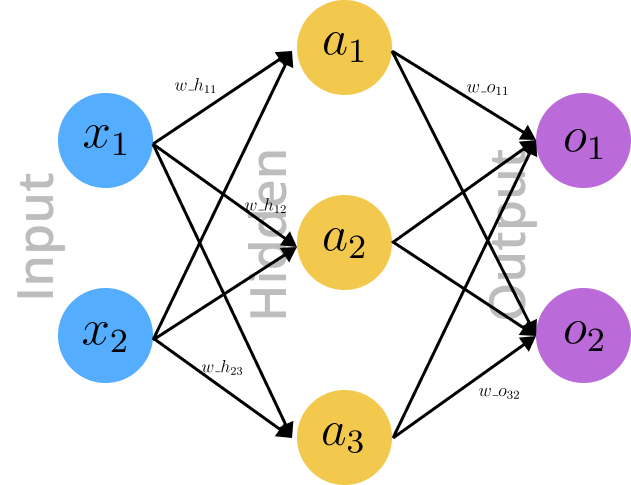

While in forward pass data flows forward through the network (from input to output), backward data flows from the output to the input according to directions (which are gradients).

P.S. Non-linearity function (like sigmoid or relu) do also pariticipate in both forward in back propogations, removed them from image for simplicity

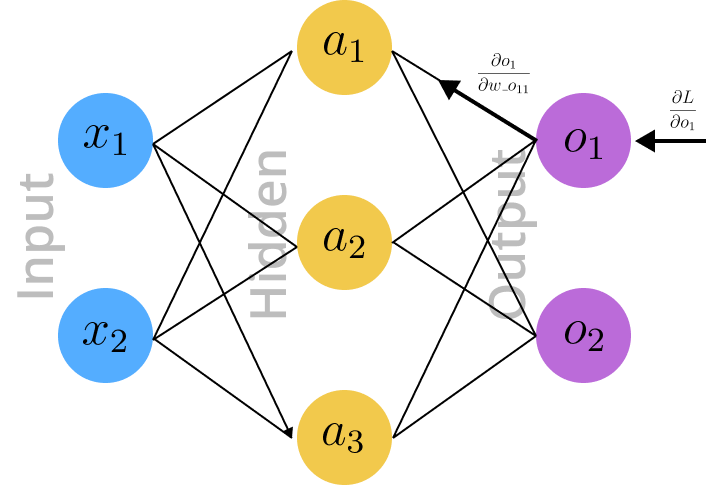

Let's find one such derivative according for loss function

Neurons of a single layer are gonna be served in a vector and weights in corresponding matrix (which you've already multiplied in the previous task).

Our loss function is defined to be MSE (with respect to predicted output score rather then predicted labels which are almost equivalent in terms of weights direction).

$$
L(x) = (y - o) ^ 2
$$

### Task 3.5 (0.5 points)

Find partial derivative relative to output layer, print it using latex and implement function.

For simplicity we dropped $\sum$ term in the Loss but don't forget to divide the derivative by number of elements in y

$$
\frac{\partial L(x)}{\partial o} = 2 (o - y)
$$

In [182]:
def calc_d_loss__d_o(y_onehot, o):
     return 2 * (o - y_onehot) / y_onehot.shape[0]


In [183]:
torch.random.manual_seed(123)
assert torch.allclose(calc_d_loss__d_o(torch.randint(5, size=(10,)), torch.rand(size=(10,))), torch.tensor([-0.3369, -0.6626, -0.3849,  0.0393,  0.0633, -0.3197, -0.1763, -0.2345,
        -0.7236, -0.6679]), 4)

In [184]:
# Do not change, we use it

def int_to_onehot(y, num_labels):
    ary = torch.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

The rest ones are already implemented for you

In [185]:
class NeuralNetMLP(nn.Module):
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classes = num_classes

        (
          self.weight_h,
          self.bias_h,
          self.weight_out,
          self.bias_out
        ) = mlp_init(
          num_features,
          num_hidden,
          num_classes,
          random_seed
        )

    def forward(self, x):
        return forward(x, self.weight_h, self.bias_h, self.weight_out, self.bias_out)


    def backward(self, x, a_h, o, y):
        y_onehot = int_to_onehot(y, self.num_classes)

        # Output weights

        # input/output dim: [n_examples, n_classes]
        d_loss__d_o = calc_d_loss__d_o(y_onehot, o)

        # input/output dim: [n_examples, n_classes]
        d_o__d_z_out = o * (1. - o) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_o * d_o__d_z_out

        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h

        # input dim: [n_classes, n_examples]
        # dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]

        d_loss__dw_out = delta_out.T @ d_z_out__dw_out
        d_loss__db_out = torch.sum(delta_out, axis=0)

        # Hidden weights

        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out

        # output dim: [n_examples, n_hidden]
        d_loss__a_h = delta_out @ d_z_out__a_h

        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative

        # [n_examples, n_features]
        d_z_h__d_w_h = x

        # output dim: [n_hidden, n_features]

        d_loss__d_w_h = (d_loss__a_h * d_a_h__d_z_h).T @ d_z_h__d_w_h
        d_loss__d_b_h = torch.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, d_loss__d_w_h, d_loss__d_b_h)


# Training Neural Network with PyTorch


First, let us load MNIST data.

In [186]:
mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# since this is inherited from Dataset we may use it in DataLoader directly
train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=True,
    num_workers=1
)


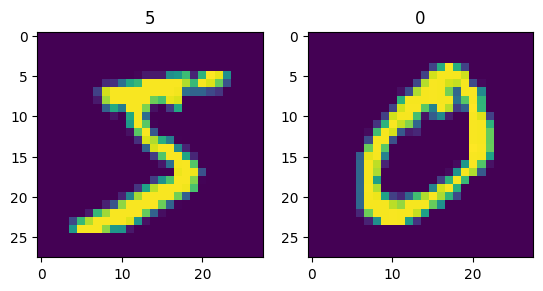

In [187]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()


At first we'll define the train loop by ourselves: weights updates, loss calc and cetera. Next we well use PyTorch methods to see how these make our life easier

In [188]:
def compute_mse_and_acc(nnet, data_loader, num_labels=10):
    mse, correct_pred, num_examples = 0, 0, 0

    for i, (features, targets) in enumerate(tqdm(data_loader, total=len(data_loader))):
        _, probas = nnet.forward(features.reshape(4, -1))
        predicted_labels = torch.argmax(probas, axis=1)
        onehot_targets = int_to_onehot(
            targets, num_labels=num_labels
        )
        loss = torch.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/i
    acc = correct_pred/num_examples
    return mse, acc

In [189]:
def train(model, train_dataloader, val_dataloader, num_epochs, learning_rate=0.1):
    epoch_loss = []

    epoch_train_acc = []
    epoch_valid_acc = []
    for e in range(num_epochs):

        for X_train_mini, y_train_mini in tqdm(train_dataloader, total=len(train_dataloader)):
            a_h, a_out = model.forward(X_train_mini.reshape(4, -1))

            # Compute gradients
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
            model.backward(X_train_mini.reshape(4, -1), a_h, a_out, y_train_mini)

            # Update weights
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out


        # Epoch Logging
        train_mse, train_acc = compute_mse_and_acc(
            model, train_dataloader
        )
        valid_mse, valid_acc = compute_mse_and_acc(
            model, val_dataloader
        )
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')
    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [190]:
model = NeuralNetMLP(num_features=28*28, num_hidden=50, num_classes=10)

In [191]:
mse, acc = compute_mse_and_acc(model, val_dataloader)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

  0%|          | 0/2500 [00:00<?, ?it/s]

Initial valid MSE: 0.2
Initial valid accuracy: 10.1%


In [192]:
torch.random.manual_seed(123)
epoch_loss, epoch_train_acc, epoch_valid_acc = train(model, train_dataloader, val_dataloader, num_epochs=2, learning_rate=0.1)

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 001/002 | Train MSE: 0.01 | Train Acc: 91.86% | Valid Acc: 92.08%


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 002/002 | Train MSE: 0.01 | Train Acc: 93.89% | Valid Acc: 93.89%


In [193]:
mse, acc = compute_mse_and_acc(model, val_dataloader)
print(f'New valid MSE: {mse:.1f}')
print(f'New valid accuracy: {acc*100:.1f}%')

  0%|          | 0/2500 [00:00<?, ?it/s]

New valid MSE: 0.0
New valid accuracy: 93.9%


We built own neural network which was able to reach 94.3% accuracy in just two epochs!

You've probably noticed how much code it required - luckily PyTorch provides us simple way of constuction almost every possible model architectures. But for now let's see at a simple sequential fully connected model as an analogy of what we've implemented so far

### Task 4.1 (0.5 points)

Using PyTorch, `torch.nn` module and `nn.Sequential`  define a neural network with the following architecture:

1) Layer that flattens the image into 784 vector

2) Linear layer which transforms 784 vector into the vector of size 128

3) ReLu activation function

4) Linear layer transforms 128 vector into the vector of size 10



In [194]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)


Using `torch.optim` create SGD optimizer, set learning rate = 0.05.

In [195]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

### Task 4.2 (1 point)

Write the training loop and train your model for 5 epochs.

For the loss function use `cross_entropy` from `torch.nn.functional`.

Namely, in the training loop you should:

1) perform forward pass

2) compute loss

3) perform backward pass

4) update model weights

5) zero grads using `optimizer.zero_grad`



At the validation step you should:

1) perform forward pass

2) compute loss

**The goal is to get the validation accuracy over 0.97 after 4 epochs**.

In [196]:
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    if epoch % 2 == 0:
        val_loss = []                                  # here we're gonna put batch mean loss
        val_accuracy = []
        model.eval()
        with torch.no_grad():                          # disabling gradient calculation during validation
            for x_val, y_val in tqdm(val_dataloader):  # taking a batch from val dataloader
                y_pred = model(x_val)
                loss = nn.functional.cross_entropy(y_pred, y_val)
                val_loss.append(loss.numpy())
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11713464558124542, accuracy: 0.9627


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08390931040048599, accuracy: 0.9752


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07696250081062317, accuracy: 0.9772


We've built pretty strong NN which reaches 97.7% accuracy on mnist!

### Task 4.3* Implement XOR with PyTorch (2 points)

In this task your goal is to a logical Exclusive Or using PyTorch.

In [299]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

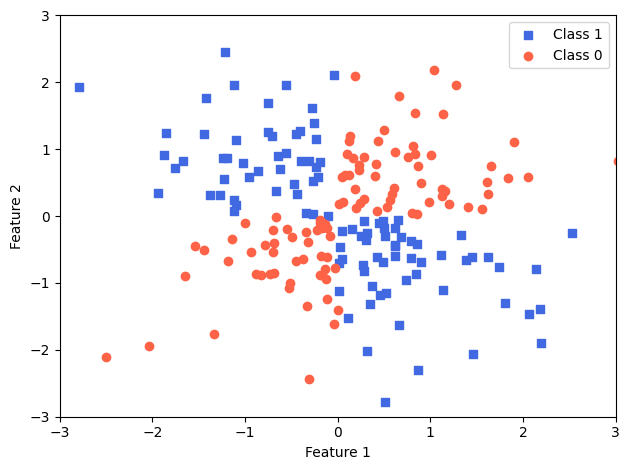

In [300]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s',label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],X_xor[y_xor == 0, 1], c='tomato', marker='o',label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [301]:
n_train = 100

x_train = torch.tensor(X_xor[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y_xor[:n_train], dtype=torch.float32)

x_valid = torch.tensor(X_xor[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y_xor[n_train:], dtype=torch.float32)

Using PyTorch, `torch.nn` module and `nn.Sequential`  define a neural network with the following architecture:

1) linear layer which transforms a 2D input into 4D.

2) ReLu activation function

3) linear layer with the same input and output size

4) ReLu activation function

5) linear layer 4D input into 1D output

6) Sigmoid function

In [302]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

Define optimizer and loss fuction.

Use Binary Cross Entropy from `torch.nn` and SGD optimizer from `torch.optim` create with the learning rate = 0.02.

In [303]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
loss_fn = nn.BCELoss()

Roll the data into the `TensorDataset` class and create `DataLoader` (do not forget to shuffle the data setting `shuffle=True`).

In [304]:
batch_size = 4
torch.manual_seed(1)

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

Write the training loop.


Namely, for each batch you should:

1) perform forward pass

2) compute the loss

3) perform backward pass

4) update weights

5) zero gradients

In [305]:
torch.manual_seed(1)
num_epochs = 250

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()

    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [308]:
loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

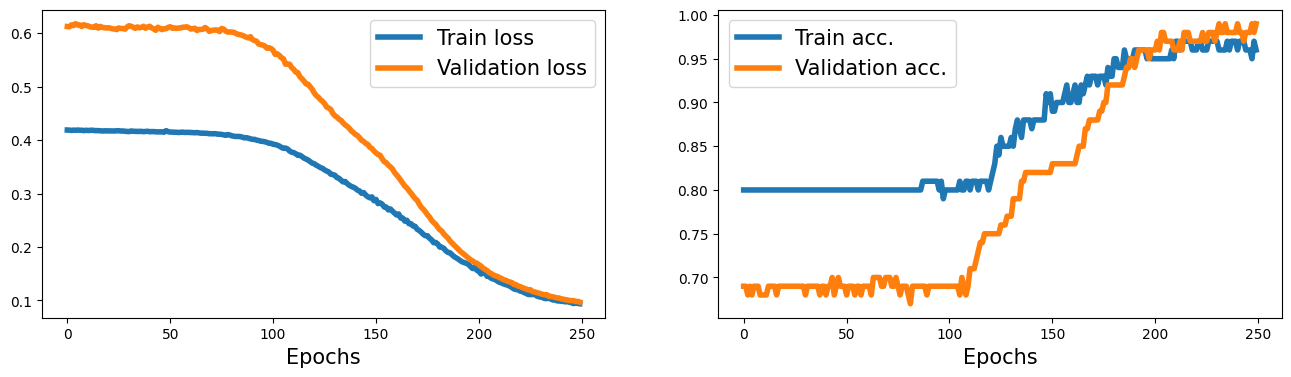

In [309]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

We reached pretty high accuracy for the test which shows us the great ability of neural networks to learn from non-linear data.